# Plots
- [x] [Activations](#activations)
- [x] [Flux weights](#flux_weights)
- [x] [Flux plot](#flux_plot)
- [x] [Flux comparison](#flux_comparison)
- [x] [Digitisation plot](#digi)
- [x] [Cross-sections](#cross_sections)
- [x] [Emission profiles](#profiles)
- [x] [Coverage](#coverage)

In [2]:
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.font_manager
import mplhep as hep
import seaborn as sns
import uproot

# Setup matplotlib style using mplhep
extra_styling = {
    "text.usetex": True,
    "pgf.texsystem": "pdflatex",
    "pgf.rcfonts": False,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "axes.xmargin": 0
}

style = hep.style.ROOT
del style['xaxis.labellocation']
del style['yaxis.labellocation']
plt.style.use([style, extra_styling])

def save(name):
    """Save a matplotlib plot to file as both a pgf and pdf.

    Args:
        name (str): output path+name
    """
    plt.savefig("{}.pdf".format(name), bbox_inches="tight")
    plt.show()

<a id='activations'></a>

## Activations

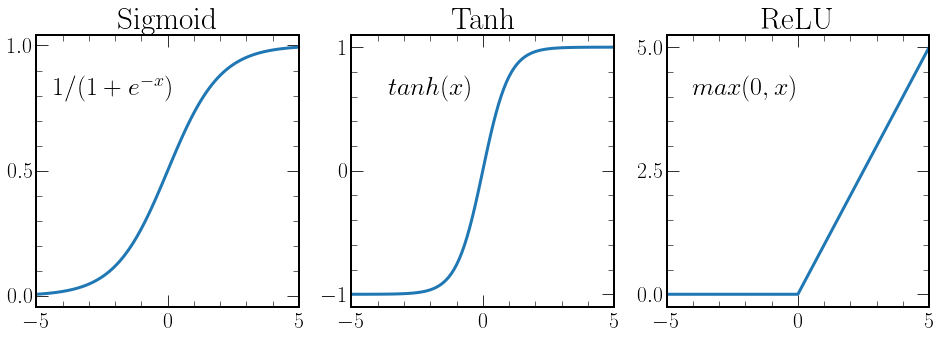

In [16]:
def tanh(x):
    return math.tanh(x)
    
def sigmoid(x):
    return 1/(1+math.exp(-x))

def relu(x):
    if x > 0:
        return float(x)
    else:
        return 0
    
x = np.arange(-5.0, 5.1, 0.1)
tanh_vec = np.vectorize(tanh, otypes=[np.float64])
tanh_result = tanh_vec(x)
sigmoid_vec = np.vectorize(sigmoid, otypes=[np.float64])
sigmoid_result = sigmoid_vec(x)
relu_vec = np.vectorize(relu, otypes=[np.float64])
relu_result = relu_vec(x)

fig, axs = plt.subplots(1, 3, figsize=(16, 5), gridspec_kw={"hspace": 0.3})
axs[1].plot(x, tanh_result, linewidth=3)
axs[1].set_title("Tanh")
axs[1].text(0.3, 0.8, "$tanh(x)$", fontsize=26, horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)
plt.setp(axs[1], xticks=[-5, 0, 5], yticks=[-1.0, 0.0, 1.0])
axs[0].plot(x, sigmoid_result, linewidth=3)
axs[0].set_title("Sigmoid")
axs[0].text(0.3, 0.8, "$1/(1+e^{-x})$", fontsize=26, horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
plt.setp(axs[0], xticks=[-5, 0, 5], yticks=[0, 0.5, 1])
axs[2].plot(x, relu_result, linewidth=3)
axs[2].set_title("ReLU")
axs[2].text(0.3, 0.8, "$max(0,x)$", fontsize=26, horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes)
plt.setp(axs[2], xticks=[-5, 0, 5], yticks=[0, 2.5, 5])
save("./diagrams/7-cvn/activations")

<a id='flux_weights'></a>

## Flux weights

In [4]:
# Open flux file
dir = uproot.open("./data/flux.root")["enufullfine"]

# Read CHIPS fluxes
nuel_cc_h = dir["CHIPSoffAXIS"]['enufullfine_nue_allpar_tot_cc_CHIPSoffAXIS'].values
anuel_cc_h = dir["CHIPSoffAXIS"]['enufullfine_anue_allpar_tot_cc_CHIPSoffAXIS'].values
numu_cc_h = dir["CHIPSoffAXIS"]['enufullfine_numu_allpar_tot_cc_CHIPSoffAXIS'].values
anumu_cc_h = dir["CHIPSoffAXIS"]['enufullfine_anumu_allpar_tot_cc_CHIPSoffAXIS'].values
nuel_nc_h = dir["CHIPSoffAXIS"]['enufullfine_nue_allpar_tot_nc_CHIPSoffAXIS'].values
anuel_nc_h = dir["CHIPSoffAXIS"]['enufullfine_anue_allpar_tot_nc_CHIPSoffAXIS'].values
numu_nc_h = dir["CHIPSoffAXIS"]['enufullfine_numu_allpar_tot_nc_CHIPSoffAXIS'].values
anumu_nc_h = dir["CHIPSoffAXIS"]['enufullfine_anumu_allpar_tot_nc_CHIPSoffAXIS'].values
nuel_flux_h = dir["CHIPSoffAXIS"]['enufullfine_nue_allpar_NoXSec_CHIPSoffAXIS'].values
anuel_flux_h = dir["CHIPSoffAXIS"]['enufullfine_anue_allpar_NoXSec_CHIPSoffAXIS'].values
numu_flux_h = dir["CHIPSoffAXIS"]['enufullfine_numu_allpar_NoXSec_CHIPSoffAXIS'].values
anumu_flux_h = dir["CHIPSoffAXIS"]['enufullfine_anumu_allpar_NoXSec_CHIPSoffAXIS'].values

# Read NoVA and MINOS fluxes
numu_flux_nova_h = dir["NOvA_FD_Shift"]["enufullfine_numu_allpar_NoXSec_NOvA_FD_Shift"].values
numu_flux_minos_h = dir["MINOS_FD"]["enufullfine_numu_allpar_NoXSec_MINOS_FD"].values

# Get the bin corresponding to 30 GeV
max_bin = np.where(dir["CHIPSoffAXIS"]['enufullfine_nue_allpar_tot_cc_CHIPSoffAXIS'].edges == 30.0)[0][0]

# Calculate the integrals up to 30 GeV
nuel_cc = np.trapz(nuel_cc_h[:max_bin])
anuel_cc = np.trapz(anuel_cc_h[:max_bin])
numu_cc = np.trapz(numu_cc_h[:max_bin])
anumu_cc = np.trapz(anumu_cc_h[:max_bin])
nuel_nc = np.trapz(nuel_nc_h[:max_bin])
anuel_nc = np.trapz(anuel_nc_h[:max_bin])
numu_nc = np.trapz(numu_nc_h[:max_bin])
anumu_nc = np.trapz(anumu_nc_h[:max_bin])

# Scale to get 6*10^20 POT
scale = (6*pow(10,20))/(50*pow(10,6))
nuel_cc = nuel_cc * scale
anuel_cc = anuel_cc * scale
numu_cc = numu_cc * scale
anumu_cc = anumu_cc * scale
nuel_nc = nuel_nc * scale
anuel_nc = anuel_nc * scale
numu_nc = numu_nc * scale
anumu_nc = anumu_nc * scale
nuel_tot = nuel_cc + nuel_nc
anuel_tot = anuel_cc + anuel_nc
numu_tot = numu_cc + numu_nc
anumu_tot = anumu_cc + anumu_nc
total = nuel_cc + anuel_cc + numu_cc + anumu_cc + nuel_nc + anuel_nc + numu_nc + anumu_nc

# Print values
print('###########################################################')
print('Events/6*10^20 POT/kt in the range [0,{}]...\n'.format(max))
print('nuel_cc: {}, frac: {}'.format(nuel_cc, nuel_cc/total))
print('anuel_cc: {}, frac: {}'.format(anuel_cc, anuel_cc/total))
print('numu_cc: {}, frac: {}'.format(numu_cc, numu_cc/total))
print('anumu_cc: {}, frac: {}'.format(anumu_cc, anumu_cc/total))
print('nuel_nc: {}, frac: {}'.format(nuel_nc, nuel_nc/total))
print('anuel_nc: {}, frac: {}'.format(anuel_nc, anuel_nc/total))
print('numu_nc: {}, frac: {}'.format(numu_nc, numu_nc/total))
print('anumu_nc: {}, frac: {}'.format(anumu_nc, anumu_nc/total))
print('Total: {}'.format(total))

print('\nnuel_tot: {}, frac: {}'.format(nuel_tot, (nuel_tot/total)))
print('anuel_tot: {}, frac: {}'.format(anuel_tot, (anuel_tot/total)))
print('numu_tot: {}, frac: {}'.format(numu_tot, (numu_tot/total)))
print('anumu_tot: {}, frac: {}'.format(anumu_tot, (anumu_tot/total)))
print('###########################################################')

# Save to file
weight_file = open('./data/event_weights.txt', 'w')
weight_file.write(str(nuel_tot/total) + '\n')
weight_file.write(str(anuel_tot/total) + '\n')
weight_file.write(str(numu_tot/total) + '\n')
weight_file.write(str(anumu_tot/total) + '\n')
weight_file.write(str(total) + '\n')
weight_file.close()

###########################################################
Events/6*10^20 POT/kt in the range [0,<built-in function max>]...

nuel_cc: 6.641224229179985, frac: 0.009420237455903322
anuel_cc: 0.5263524245342096, frac: 0.0007466040376737761
numu_cc: 509.9145947050906, frac: 0.7232878154071548
anumu_cc: 12.096573209805495, frac: 0.017158371424714946
nuel_nc: 2.191118185459738, frac: 0.0031079892635288036
anuel_nc: 0.18817003756334572, frac: 0.0002669095899735694
numu_nc: 169.05911184741962, frac: 0.2398017176847306
anumu_nc: 4.378271906224289, frac: 0.006210355136320382
Total: 704.9954165452772

nuel_tot: 8.832342414639722, frac: 0.012528226719432125
anuel_tot: 0.7145224620975553, frac: 0.0010135136276473455
numu_tot: 678.9737065525103, frac: 0.9630895330918855
anumu_tot: 16.474845116029783, frac: 0.02336872656103533
###########################################################


<a id='flux_plot'></a>

## Flux plot

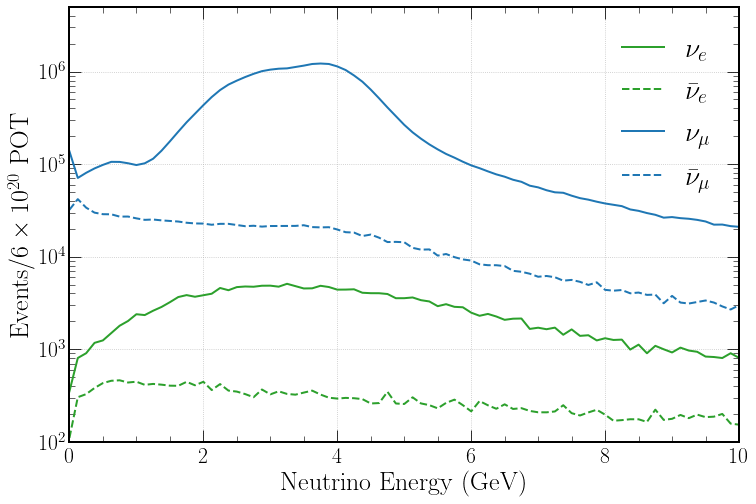

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(12, 8), gridspec_kw={"hspace": 0.3})
energies = np.arange(0.0, 30.0, 0.125)
axs.plot(energies, nuel_flux_h[:max_bin]*scale, color="tab:green", linewidth=2)
axs.plot(energies, anuel_flux_h[:max_bin]*scale, color="tab:green", linewidth=2, linestyle="dashed")
axs.plot(energies, numu_flux_h[:max_bin]*scale, color="tab:blue", linewidth=2)
axs.plot(energies, anumu_flux_h[:max_bin]*scale, color="tab:blue", linewidth=2, linestyle="dashed")

nuel = Line2D([0], [0], color="tab:green", linewidth=2, linestyle="solid", label=r"$\nu_{e}$")
anuel = Line2D([0], [0], color="tab:green", linewidth=2, linestyle="dashed", label=r"$\bar{\nu}_{e}$")
numu = Line2D([0], [0], color="tab:blue", linewidth=2, linestyle="solid", label=r"$\nu_{\mu}$")
anumu = Line2D([0], [0], color="tab:blue", linewidth=2, linestyle="dashed", label=r"$\bar{\nu}_{\mu}$")
axs.legend(handles=[nuel, anuel, numu, anumu], loc="upper right", fontsize=28)

axs.set_yscale('log')
axs.set_ylim(1e2, 5e6)
axs.set_xlim(0, 10)
axs.set_ylabel(r"Events/$6\times10^{20}$ POT")
axs.set_xlabel("Neutrino Energy (GeV)")
axs.grid()
               
save("./diagrams/4-chips/flux")

<a id='flux_comparison'></a>

## Flux comparison

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


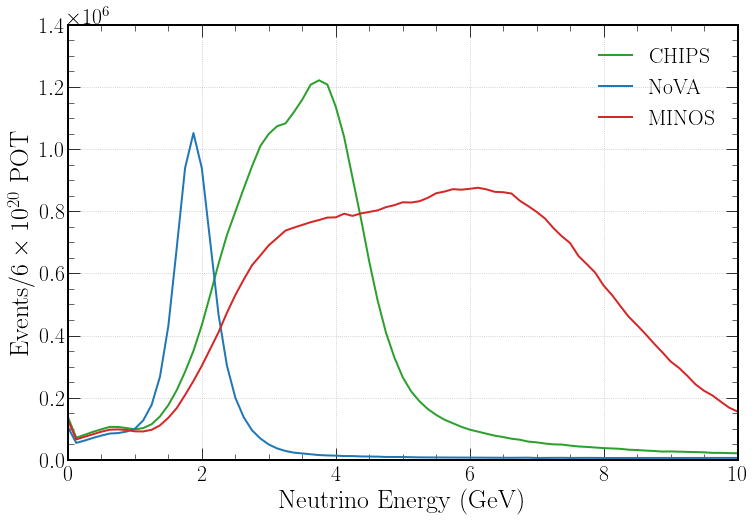

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(12, 8), gridspec_kw={"hspace": 0.3})
energies = np.arange(0.0, 30.0, 0.125)
axs.plot(energies, numu_flux_h[:max_bin]*scale, color="tab:green", linewidth=2)
axs.plot(energies, numu_flux_nova_h[:max_bin]*scale, color="tab:blue", linewidth=2)
axs.plot(energies, numu_flux_minos_h[:max_bin]*scale, color="tab:red", linewidth=2)

chips = Line2D([0], [0], color="tab:green", linewidth=2, linestyle="solid", label=r"CHIPS")
nova = Line2D([0], [0], color="tab:blue", linewidth=2, linestyle="solid", label=r"NoVA")
minos = Line2D([0], [0], color="tab:red", linewidth=2, linestyle="solid", label=r"MINOS")
axs.legend(handles=[chips, nova, minos], loc="upper right")

axs.set_ylim(0, 1.4e6)
axs.set_xlim(0, 10)
axs.set_ylabel(r"Events/$6\times10^{20}$ POT")
axs.set_xlabel("Neutrino Energy (GeV)")
axs.grid()
               
save("./diagrams/4-chips/flux_comparison")

<a id='digi'></a>

## Digitisation plot

In [6]:
digi_file = uproot.open("./data/digi.root")
raw = digi_file["rawDigiPDF"].values
raw = np.rot90(raw, 1)
pois = digi_file["poissonDigiPDF_digiNorm_ln"].values
pois = np.rot90(pois, 1)
bins = np.arange(0,11,1)

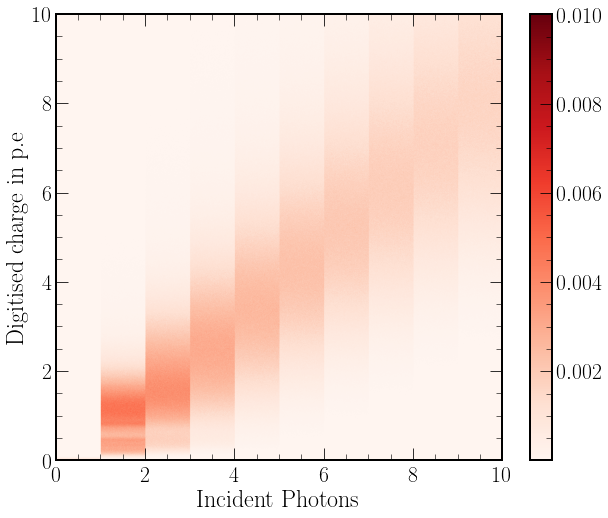

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
plt.imshow(raw, cmap="Reds", vmin=1e-5, vmax=1e-2, extent=[bins.min(), bins.max(),bins.min(),bins.max()])
plt.colorbar(shrink=0.82)
axs.set_xlabel('Incident Photons', fontsize = 24)
axs.set_ylabel('Digitised charge in p.e', fontsize = 24)
save("./diagrams/5-chips/digi_method")

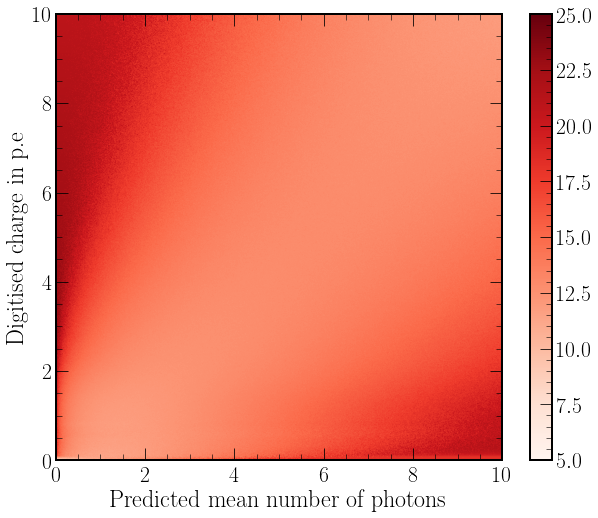

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
plt.imshow(pois, cmap=plt.cm.Reds, vmin=5, vmax=25, extent=[bins.min(), bins.max(),bins.min(),bins.max()])
plt.colorbar(shrink=0.82)
axs.set_xlabel('Predicted mean number of photons', fontsize = 24)
axs.set_ylabel('Digitised charge in p.e', fontsize = 24)
save("./diagrams/5-chips/digi_likelihood")

<a id='cross_sections'></a>

## Cross-sections

In [30]:
def cross_sections(in_file, out_name, y_max, nu_type):
    cs_file = uproot.open(in_file)
    
    energies = cs_file[out_name]["tot_cc"].xvalues
    tot_cc_g = cs_file[out_name]["tot_cc"].yvalues/energies
    coh_cc_g = cs_file[out_name]["coh_cc"].yvalues/energies
    mec_cc_g = cs_file[out_name]["mec_cc"].yvalues/energies
    try:
        qel_cc_g = cs_file[out_name]["qel_cc_p"].yvalues/energies
    except:
        qel_cc_g = cs_file[out_name]["qel_cc_n"].yvalues/energies
    dis_cc_p_g = cs_file[out_name]["dis_cc_p"].yvalues/energies
    dis_cc_n_g = cs_file[out_name]["dis_cc_n"].yvalues/energies
    res_cc_p_g = cs_file[out_name]["res_cc_p"].yvalues/energies
    res_cc_n_g = cs_file[out_name]["res_cc_n"].yvalues/energies
    tot_nc_g = cs_file[out_name]["tot_nc"].yvalues/energies
    coh_nc_g = cs_file[out_name]["coh_nc"].yvalues/energies
    mec_nc_g = cs_file[out_name]["mec_nc"].yvalues/energies
    qel_nc_p_g = cs_file[out_name]["qel_nc_p"].yvalues/energies
    qel_nc_n_g = cs_file[out_name]["qel_nc_n"].yvalues/energies
    dis_nc_p_g = cs_file[out_name]["dis_nc_p"].yvalues/energies
    dis_nc_n_g = cs_file[out_name]["dis_nc_n"].yvalues/energies
    res_nc_p_g = cs_file[out_name]["res_nc_p"].yvalues/energies
    res_nc_n_g = cs_file[out_name]["res_nc_n"].yvalues/energies

    dis_cc_g = dis_cc_p_g + dis_cc_n_g
    res_cc_g = res_cc_p_g + res_cc_n_g
    dis_nc_g = dis_nc_p_g + dis_nc_n_g
    qel_nc_g = qel_nc_p_g + qel_nc_n_g
    res_nc_g = res_nc_p_g + res_nc_n_g
    
    [tot_cc_g, qel_cc_g, res_cc_g, dis_cc_g, coh_cc_g, mec_cc_g]
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={"wspace": 0.1})
    axs[0].plot(energies, tot_cc_g, color="black", linewidth=2)
    axs[0].plot(energies, qel_cc_g, color="tab:blue", linewidth=2)
    axs[0].plot(energies, dis_cc_g, color="tab:red", linewidth=2)
    axs[0].plot(energies, res_cc_g, color="tab:green", linewidth=2)
    axs[0].plot(energies, coh_cc_g, color="yellow", linewidth=2)
    axs[0].plot(energies, mec_cc_g, color="cyan", linewidth=2)
    
    axs[1].plot(energies, tot_nc_g, color="black", linewidth=2)
    axs[1].plot(energies, qel_nc_g, color="tab:blue", linewidth=2)
    axs[1].plot(energies, dis_nc_g, color="tab:red", linewidth=2)
    axs[1].plot(energies, res_nc_g, color="tab:green", linewidth=2)
    axs[1].plot(energies, coh_nc_g, color="yellow", linewidth=2)
    axs[1].plot(energies, mec_nc_g, color="cyan", linewidth=2)
    
    tot = Line2D([0], [0], color="black", linewidth=2, linestyle="solid", label=r"Total")
    qel = Line2D([0], [0], color="tab:blue", linewidth=2, linestyle="solid", label=r"QEL")
    dis = Line2D([0], [0], color="tab:red", linewidth=2, linestyle="solid", label=r"DIS")
    res = Line2D([0], [0], color="tab:green", linewidth=2, linestyle="solid", label=r"Res")
    coh = Line2D([0], [0], color="yellow", linewidth=2, linestyle="solid", label=r"Coh")
    mec = Line2D([0], [0], color="cyan", linewidth=2, linestyle="solid", label=r"MEC")
    axs[1].legend(handles=[tot, qel, dis, res, coh, mec], loc="upper right", fontsize=25)

    axs[0].set_ylim(0, y_max)
    axs[0].set_xlim(0, 10)
    axs[1].set_ylim(0, y_max)
    axs[1].set_xlim(0, 10)
    axs[1].label_outer()
    if nu_type == 0:
        axs[0].set_ylabel(r"$\nu_{e}$ $\sigma_{O^{16}}$/$E_{\nu}$ ($10^{-38}cm^{2}$/GeV)")
    else:
        axs[0].set_ylabel(r"$\nu_{\mu}$ $\sigma_{O^{16}}$/$E_{\nu}$ ($10^{-38}cm^{2}$/GeV)")
    axs[0].set_xlabel(r"$E_{\nu}$ (GeV)")
    axs[1].set_xlabel(r"$E_{\nu}$ (GeV)")
    axs[0].grid()
    save("./diagrams/3-theory/xsec_" + out_name)

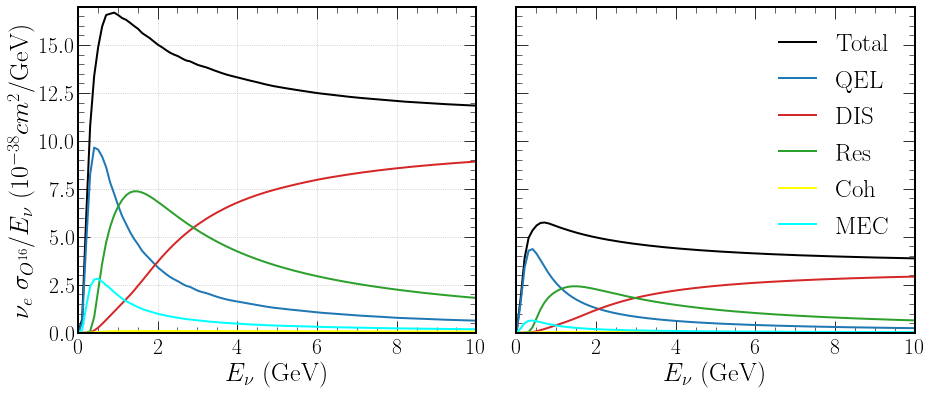

In [31]:
cross_sections('./data/xsec_nuel.root', 'nu_e_O16', 17, 0)

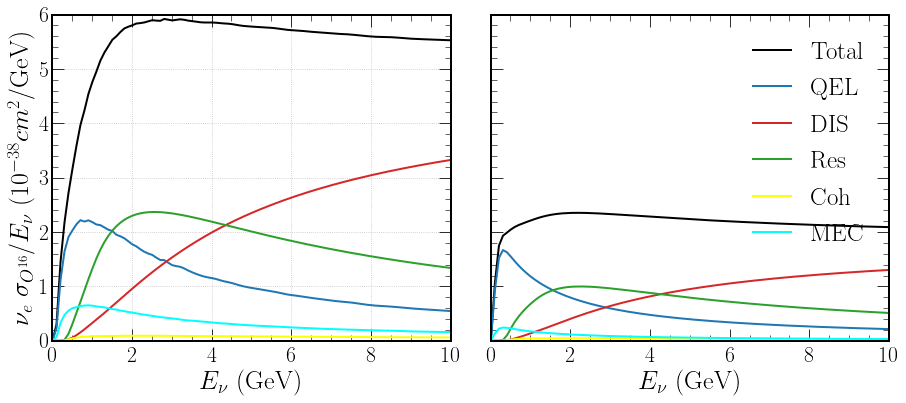

In [32]:
cross_sections('./data/xsec_anuel.root', 'nu_e_bar_O16', 6, 0)

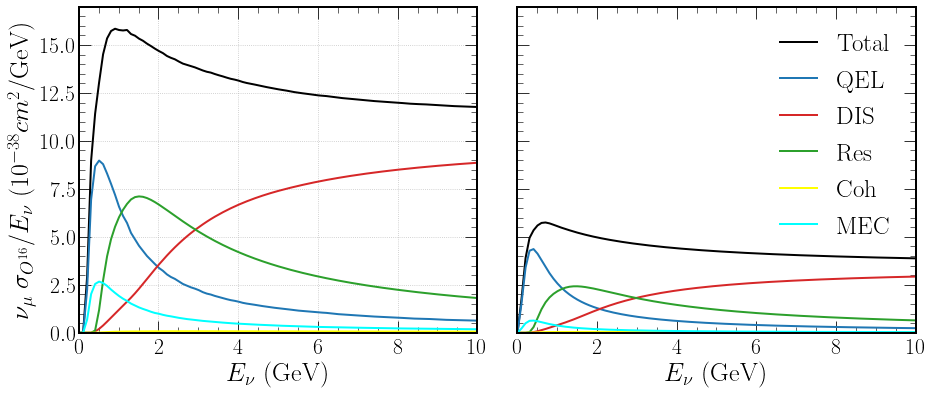

In [33]:
cross_sections('./data/xsec_numu.root', 'nu_mu_O16', 17, 1)

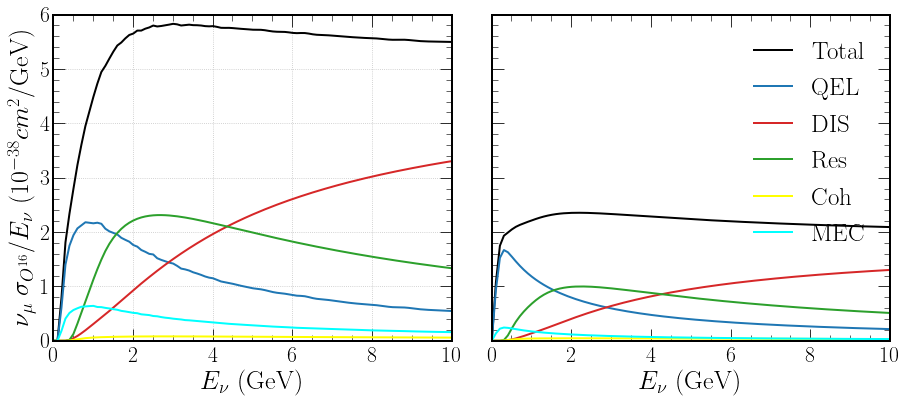

In [34]:
cross_sections('./data/xsec_anumu.root', 'nu_mu_bar_O16', 6, 1)

<a id='profiles'></a>

## Emission profiles

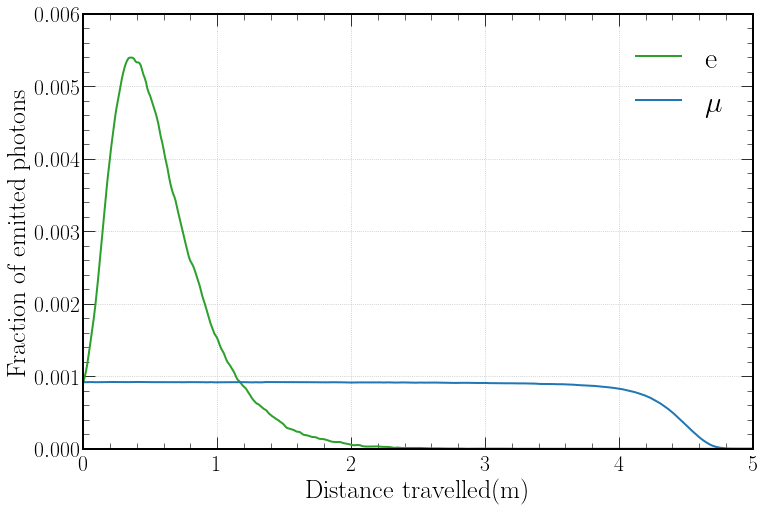

In [29]:
# This is for 2500 MeV particles
el_d = uproot.open("./data/profile_electrons.root")["fRho"].values
mu_d = uproot.open("./data/profile_muons.root")["fRho"].values
pi_d = uproot.open("./data/profile_pions.root")["fRho"].values
pr_d = uproot.open("./data/profile_protons.root")["fRho"].values

fig, axs = plt.subplots(1, 1, figsize=(12, 8), gridspec_kw={"hspace": 0.3})
distances = np.arange(0, 13, 0.01)
axs.plot(distances, el_d, color="tab:green", linewidth=2)
axs.plot(distances, mu_d, color="tab:blue", linewidth=2)
#axs.plot(distances, pi_d, color="tab:red", linewidth=2)
#axs.plot(distances, pr_d, color="tab:pink", linewidth=2)

el = Line2D([0], [0], color="tab:green", linewidth=2, linestyle="solid", label=r"e")
mu = Line2D([0], [0], color="tab:blue", linewidth=2, linestyle="solid", label=r"$\mu$")
#pi = Line2D([0], [0], color="tab:red", linewidth=2, linestyle="solid", label=r"$\pi^{\pm}$")
#pr = Line2D([0], [0], color="tab:pink", linewidth=2, linestyle="solid", label=r"P")
axs.legend(handles=[el, mu], loc="upper right", fontsize=30)

axs.set_ylim(0, 0.006)
axs.set_xlim(0, 5)
axs.set_ylabel(r"Fraction of emitted photons")
axs.set_xlabel(r"Distance travelled(m)")
axs.grid()
               
save("./diagrams/4-chips/emission_distance")

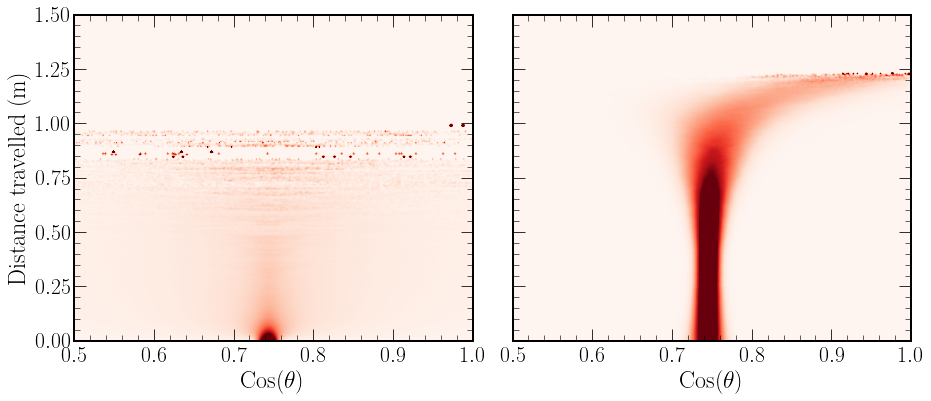

In [15]:
el_g = uproot.open("./data/profile_electrons.root")["fGFine"].values
el_g = np.rot90(el_g, 1)
mu_g = uproot.open("./data/profile_muons.root")["fGFine"].values
mu_g = np.rot90(mu_g, 1)
pi_g = uproot.open("./data/profile_pions.root")["fGFine"].values
pi_g = np.rot90(pi_g, 1)
pr_g = uproot.open("./data/profile_protons.root")["fGFine"].values
pr_g = np.rot90(pr_g, 1)

bins = uproot.open("./data/profile_electrons.root")["fGFine"].edges
 

fig, axs = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={"wspace": 0.1})
axs[0].imshow(el_g, cmap=plt.cm.Reds, vmin=0, vmax=0.01, origin="upper", extent=[-0.5, 1, 0, 3.250], aspect="auto")
#plt.colorbar()
axs[0].set_xlabel(r'Cos($\theta$)', fontsize = 24)
axs[0].set_ylabel(r'Distance travelled (m)', fontsize = 24)
axs[0].set_ylim(0, 1.5)
axs[0].set_xlim(0.5, 1)
axs[1].imshow(mu_g, cmap=plt.cm.Reds, vmin=0, vmax=0.01, origin="upper", extent=[-0.5, 1, 0, 3.250], aspect="auto")
#plt.colorbar()
axs[1].set_xlabel(r'Cos($\theta$)', fontsize = 24)
axs[1].set_ylabel(r'Distance travelled (m)', fontsize = 24)
axs[1].label_outer()
axs[1].set_ylim(0, 1.5)
axs[1].set_xlim(0.5, 1)
save("./diagrams/4-exp/emission_profile")

<a id='coverage'></a>

## Coverage

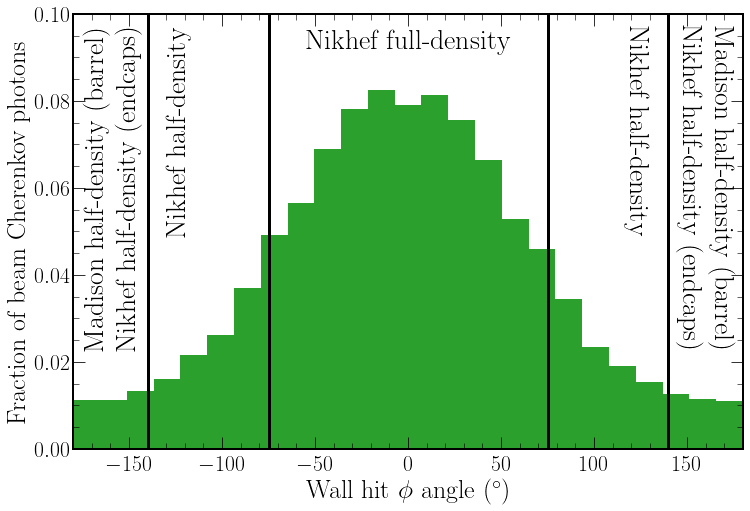

In [2]:
sim_plots = uproot.open("./data/sim_plots.root")
fig, axs = plt.subplots(1, 1, figsize=(12, 8), gridspec_kw={"hspace": 0.3})
angles = np.arange(-172.8, 187.2, 14.4)
#axs.axvspan(-75, 75, alpha=0.3, color="tab:grey", hatch="/")
#axs.axvspan(-140, -75, alpha=0.3, color="tab:grey", hatch="|")
#axs.axvspan(75, 140, alpha=0.3, color="tab:grey", hatch="|")
#axs.axvspan(-180, -140, alpha=0.3, color="tab:grey", hatch="-")
#axs.axvspan(140, 180, alpha=0.3, color="tab:grey", hatch="-")
axs.bar(angles, sim_plots["hitPhi"].values, color="tab:green", width=14.4)
axs.plot([75, 75], [0, 0.1], 'k-', lw=3)
axs.plot([-75, -75], [0, 0.1], 'k-', lw=3)
axs.plot([140, 140], [0, 0.1], 'k-', lw=3)
axs.plot([-140, -140], [0, 0.1], 'k-', lw=3)

axs.text(-55, 0.092, "Nikhef full-density", fontsize=28)
axs.text(-130, 0.05, "Nikhef half-density", fontsize=28, rotation=90)
axs.text(116, 0.05, "Nikhef half-density", fontsize=28, rotation=-90)
axs.text(-175, 0.024, "Madison half-density (barrel)", fontsize=28, rotation=90)
axs.text(161, 0.024, "Madison half-density (barrel)", fontsize=28, rotation=-90)
axs.text(-158, 0.024, "Nikhef half-density (endcaps)", fontsize=28, rotation=90)
axs.text(144, 0.024, "Nikhef half-density (endcaps)", fontsize=28, rotation=-90)

axs.set_ylim(0, 0.1)
axs.set_xlim(-180, 180)
axs.set_ylabel(r"Fraction of beam Cherenkov photons")
axs.set_xlabel(r"Wall hit $\phi$ angle ($^\circ$)")
save("./diagrams/4-chips/coverage")